In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.stats as stats

# Question 2

In [109]:
X = np.genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = np.genfromtxt('job_right_out_of_college_y.csv', delimiter=',')
print(X.shape)
print(y.shape)

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

(1000, 7)
(1000,)


(800, 8)

In [105]:
w = np.ones_like(X_val[0])
Φ = X_train
n = X_train.shape[0]
y = y_train

def q(x=None, X=None, w=None):
	if X is None:
		return 1/(1 + np.exp(-x.T.dot(w)))
	else:
		return 1/(1 + np.exp(-X.dot(w)))

def dL(Φ, y, w):
	return Φ.T.dot(q(None, Φ, w) - y)/n

def gradient_descent(Φ, y, w, η, λ, epochs):
	for i in range(epochs):
		w = w - η* (dL(Φ, y, w) + λ * np.sign(w))
	return w

w = gradient_descent(Φ, y, w, 0.1, 0.01, 10000)

preds = []
for x in X_val: 
    preds.append(round(q(x, None, w)))

correct = 0
for i in range(len(preds)):
    if y_val[i] == preds[i]:
        correct += 1

print("Validation accuracy: ", correct/len(y_val))

preds = []
for x in X_test: 
    preds.append(round(q(x, None, w)))

correct = 0
for i in range(len(preds)):
    if y_test[i] == preds[i]:
        correct += 1

print("Test accuracy: ", correct/len(y_test))

Validation accuracy:  0.95
Test accuracy:  0.95


In [106]:
w

array([-5.79863935e+00,  1.42281932e-04,  6.13838193e-01, -8.40380711e-04,
        1.79526788e+00, -6.70018003e-01,  4.92695650e+00,  1.79234892e+00])

In [146]:
features = ['bias', 'Fitness Level', 'College GPA', 'Height', 'Social Network', 'Serious Relationship', 'Economic Condition', 'Internships']

for i in range(len(features)):
    print(f"{features[i]}: {w[i]:.2f}")

bias: -5.80
Fitness Level: 0.00
College GPA: 0.61
Height: -0.00
Social Network: 1.80
Serious Relationship: -0.67
Economic Condition: 4.93
Internships: 1.79


Ranking of feature importance: 

1. Economic Condition
2. Social Network
3. Internships
4. Serious Relationship
5. College GPA
6. Height
7. Fitness Level

Economic condition is by far the most important feature leading to getting a job out of college. Next is Social Network and Internships, which are basically even. Next is serious relationship (the less serious the relationship, the more likely to get a job) and GPA. Last are fitness level and height which have nearly no impact.

In [147]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=1/0.01, max_iter = 10000, random_state=42).fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy: {accuracy}")
print()

coefs = model.coef_[0]
for i in range(len(features)):
    print(f"{features[i]}: {coefs[i]:.2f}")

Accuracy: 1.0

bias: -96.44
Fitness Level: 7.34
College GPA: 47.90
Height: -0.79
Social Network: 68.12
Serious Relationship: -29.52
Economic Condition: 146.53
Internships: 59.98


SKLearn was able to achieve 100% accuracy on the test dataset. This was an improvement over my accuracy of 95%.

Similar to the order of importance of my weights, SKLearn determined this order of importance: Economic condition by far the most importance, social network and internships coming after with similar weights, then GPA, then serious relatinship (also inversly correlated), fitness level having a little bit of importance, and height having almost 0 impact.

# Question 3

In [187]:
def p_max(x):
    return np.exp(-(x-40000))

def f_max(x):
    p_clipped = np.clip(p_max(x), a_min=1e-10, a_max=None)
    return -p_max(x) * np.log(p_clipped)

def p_ella(x):
    return 1/150000

def f_ella(x):
    p_clipped = np.clip(p_ella(x), a_min=1e-10, a_max=None)
    return -p_ella(x) * np.log(p_clipped)

def p_anushka(x):
    return stats.norm.pdf(x + 60000, 60000, 3000)

def f_anushka(x):
    p_clipped = np.clip(p_anushka(x), a_min=1e-10, a_max=None)
    return -p_anushka(x) * np.log(p_clipped)

In [188]:
ans_max, _ = quad(f_max, 40000, np.inf)
ans_ella, _ = quad(f_ella, 30000, 180000)
ans_anushka, _ = quad(f_anushka, -np.inf, np.inf)
print(f"Max: {ans_max:.2f}")
print(f"Ella: {ans_ella:.2f}")
print(f"Anushka: {ans_anushka:.2f}")

Max: 1.00
Ella: 11.92
Anushka: 9.43


In [199]:
samples_max = np.random.exponential(size=10000) + 40000
vals = np.log(np.clip(p_max(samples_max), 1e-10, None))
ans_max_sampled = -np.mean(vals)

samples_ella = np.random.uniform(30000, 180000, 10000)
vals = np.log(np.clip(p_ella(samples_ella), 1e-10, None))
ans_ella_sampled = -np.mean(vals)

samples_anushka = np.random.normal(0, 3000, 10000)
vals = np.log(np.clip(p_anushka(samples_anushka), 1e-10, None))
ans_anushka_sampled = -np.mean(vals)

print(f"Max: {ans_max_sampled:.2f}")
print(f"Ella: {ans_ella_sampled:.2f}")
print(f"Anushka: {ans_anushka_sampled:.2f}")

Max: 1.00
Ella: 11.92
Anushka: 9.42


Ella suffers from the most uncertainy.

# Question 4

In [269]:
slept = np.genfromtxt('hours_slept.csv', delimiter=',')
remember = np.genfromtxt('how_much_is_remembered.csv', delimiter=',')
print(slept.shape)
print(remember.shape)

(100000,)
(100000,)


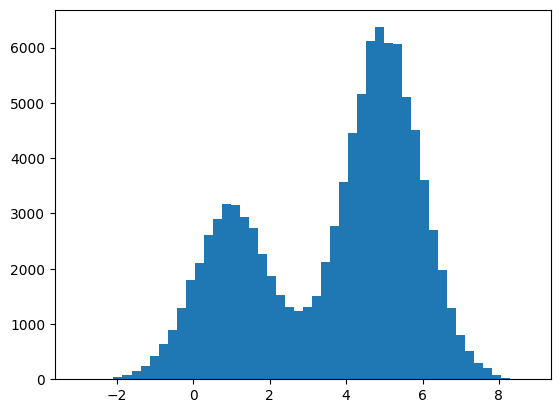

In [204]:
plt.hist(slept, bins=50)
plt.show()

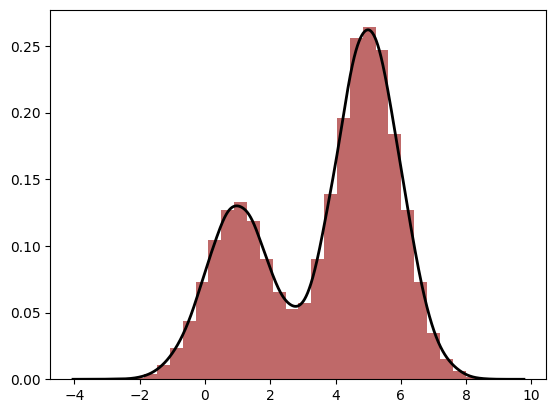

In [214]:
def gaussian_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

def compute_kde(data, xs, bandwidth, chunk_size=1000):
    n = len(data)
    m = len(xs)
    pdf = np.zeros(m)
    
    for i in range(0, m, chunk_size):
        x_chunk = xs[i:i+chunk_size]
        differences = (x_chunk[None, :] - data[:, None]) / bandwidth
        pdf_chunk = np.sum(gaussian_kernel(differences), axis=0) / (n * bandwidth)
        pdf[i:i+chunk_size] = pdf_chunk
        
    return pdf

bandwidth = 1.06 * np.std(slept) * (len(slept) ** (-1/5))
x = np.linspace(np.min(slept) - 1, np.max(slept) + 1, 10000)
pdf = compute_kde(slept, x, bandwidth)

plt.hist(slept, bins=30, alpha=0.7, color='brown', density=True, label='Histogram')
plt.plot(x, pdf, color='black', lw=2, label='KDE')

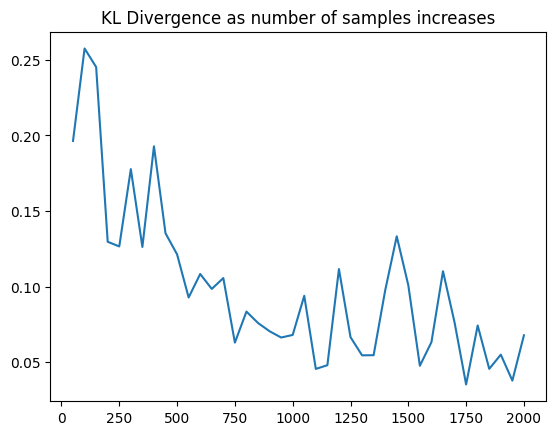

In [280]:
def kl_divergence(p, q):
    p = np.clip(p, 1e-10, 1) / np.sum(p)
    q = np.clip(q, 1e-10, 1) / np.sum(q)
    kl = np.sum(p * np.log(p / q))
    return kl

sample_sizes = list(range(50, 2001, 50))

kl_list = []
for n in sample_sizes:
    q_index = np.random.choice(len(slept), size=n, replace=False)
    q = slept[q_index]
    bandwidth = 1.06 * np.std(q) * (len(q) ** (-1/5))
    x = np.linspace(np.min(q) - 1, np.max(q) + 1, 10000)
    sample_pdf = compute_kde(q, x, bandwidth)
    kl = kl_divergence(pdf, sample_pdf)
    kl_list.append(kl)

plt.plot(sample_sizes, kl_list)
plt.title('KL Divergence as number of samples increases')
plt.show()

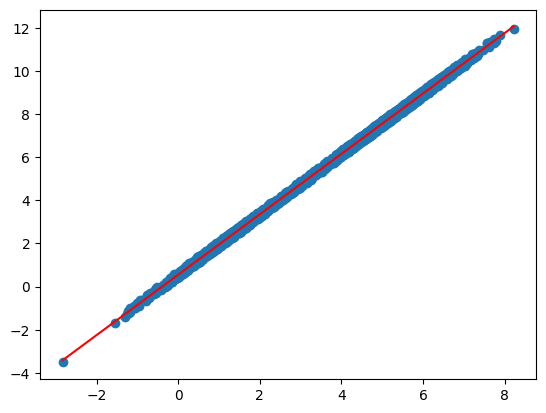

In [273]:
X_train = np.hstack([np.ones_like(q).reshape(-1, 1), q.reshape(-1, 1)])
y_train = remember[q_index].reshape(-1, 1)

w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

plt.scatter(q, y_train)
x = np.linspace(np.min(X_train), np.max(X_train), 1000)
y = w[0] + w[1] * x
plt.plot(x, y, color='red')
plt.show()

In [279]:
mse_list = []
for i in range(len(slept)):
    predicted = w[0] + w[1] * slept[i]
    actual = remember[i]
    mse = (actual - predicted) ** 2
    mse_list.append(mse)

print('MSE:', sum(mse_list) / len(mse_list))

MSE: [0.00748665]


I used a sample of 2000, so our n sub is a sample of 2000 from the original dataset. That is only 2% of the dataset.